<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



# Project Case Scenario

You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on **housing prices derived from the U.S. Census Service** to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

- Is there a significant difference in the median value of houses bounded by the Charles river or not?

- Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

- Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

- What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic. 

#### 1. General Information on the Dataset

- Variable Names
- Rows count
- Data types

#### 2. Data Visualization

For all visualizations, please include a title in each graph and appropriate labels.

Generate the following and explain your findings:

1. For the "Median value of owner-occupied homes" provide a **boxplot**

2. Provide a  **bar plot** for the Charles river variable

3. Provide a **boxplot** for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

4. Provide a **scatter plot** to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

5. Create a **histogram** for the pupil to teacher ratio variable

#### 3. Hypothesis & Testing

For each of the following questions:

1. Is there a significant difference in median value of houses bounded by the Charles river or not? (**T-test for independent samples**)

2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (**ANOVA**)

3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (**Pearson Correlation**)

4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (**Regression analysis**)

Be sure to:

- State your hypothesis.

- Use α = 0.05

- Perform the test Statistics.

- State the conclusion from the test.

#### Import the required libraries we need for the lab.


In [19]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [20]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [21]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [22]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## 1. General Information on the dataset variables

The following describes the dataset variables:

- **CRIM** - per capita crime rate by town

- **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.

- **INDUS** - proportion of non-retail business acres per town.

- **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

- **NOX** - nitric oxides concentration (parts per 10 million)

- **RM** - average number of rooms per dwelling

- **AGE** - proportion of owner-occupied units built prior to 1940

- **DIS** - weighted distances to five Boston employment centres

- **RAD** - index of accessibility to radial highways

- **TAX** - full-value property-tax rate per $10,000

- **PTRATIO** - pupil-teacher ratio by town

- **LSTAT** - % lower status of the population

- **MEDV** - Median value of owner-occupied homes in $1000's

In [23]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [24]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [25]:
boston_df.dtypes

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS          float64
NOX           float64
RM            float64
AGE           float64
DIS           float64
RAD           float64
TAX           float64
PTRATIO       float64
LSTAT         float64
MEDV          float64
dtype: object

In [26]:
boston_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [27]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [28]:
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object

In [29]:
boston_df.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
LSTAT      506
MEDV       506
dtype: int64

In [30]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [31]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [32]:
boston_df.duplicated().sum()

0

In [33]:
# Correlation between columns
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


## 2. Data Visualization

### 2.1) For the "Median value of owner-occupied homes" provide a **boxplot**

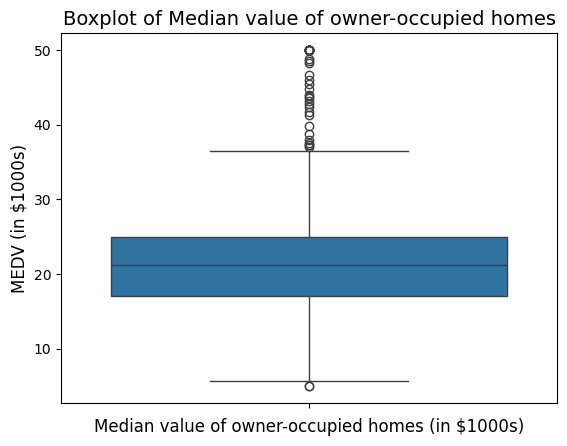

In [47]:
sns.boxplot(y='MEDV', data=boston_df)
plt.xlabel('Median value of owner-occupied homes (in $1000s)', fontsize=12)
plt.ylabel('MEDV (in $1000s)', fontsize=12)
plt.title('Boxplot of Median value of owner-occupied homes', fontsize=14)
plt.show()

### 2.2) Provide a  **bar plot** for the Charles river variable

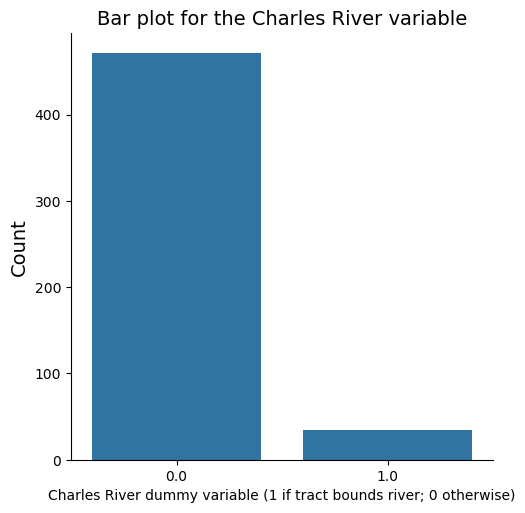

In [45]:
# The sns.catplot function in Seaborn is used to create categorical plots that visualize the relationship between a numerical variable and one or more categorical variables. 
# You can specify different types of plots using the kind parameter, such as bar, box, or violin plots.
sns.catplot(x='CHAS', kind='count', data=boston_df)
plt.xlabel("Charles River dummy variable (1 if tract bounds river; 0 otherwise)", fontsize=10)
plt.ylabel("Count", fontsize=14)
plt.title("Bar plot for the Charles River variable", fontsize=14)
plt.show()

**Findings:** The proportion of tracts bordering the river (CHAS=1) is very small.

### 2.3) Provide a **boxplot** for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

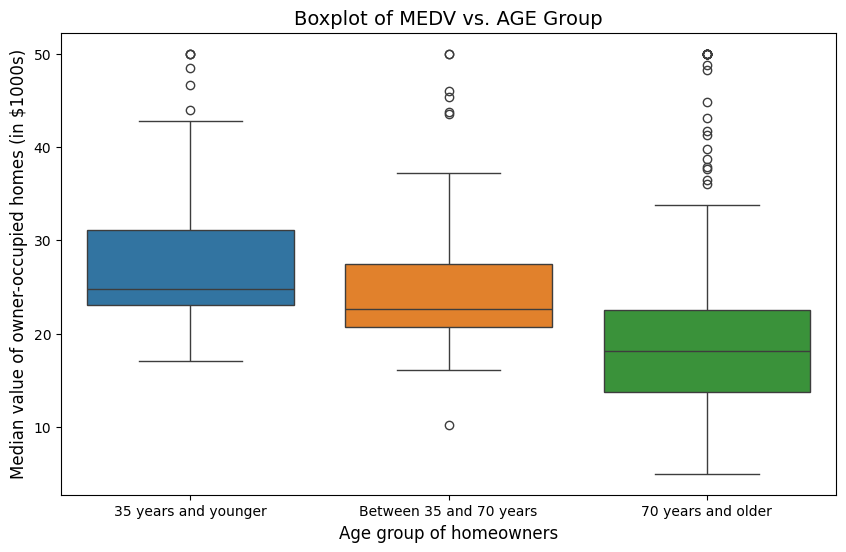

In [46]:
# Discretize the AGE variable into three groups
bins = [0, 35, 70, 100]
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']
boston_df['age_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

# Create the boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df, hue = 'age_group')

# Add labels and title
plt.xlabel('Age group of homeowners', fontsize=12)
plt.ylabel('Median value of owner-occupied homes (in $1000s)', fontsize=12)
plt.title('Boxplot of MEDV vs. AGE Group', fontsize=14)

# Show the plot
plt.show()

**Findings:** The homes of owners under 35 years of age have higher median value than that of other age groups, i.e. "35 to 70" & "70 and above". The 70+ (70 and above) age group has the lowest median value of homes.

### 2.4) Provide a **scatter plot** to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

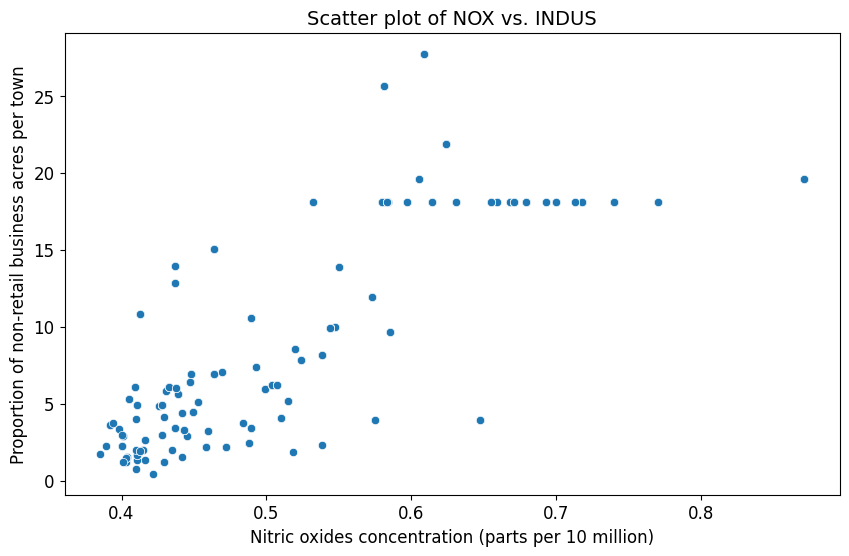

In [48]:
# INDUS - proportion of non-retail business acres per town
# NOX - nitric oxides concentration (parts per 10 million)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)

plt.xlabel('Nitric oxides concentration (parts per 10 million)', fontsize=12)
plt.ylabel('Proportion of non-retail business acres per town', fontsize=12)
plt.title('Scatter plot of NOX vs. INDUS', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

**Findings:** There is a positive relationship between nitric oxides concentration (NOX) and proportion of non-retail business acres per town (INDUS). The proportion of non-retail business acres per town (INDUS) increases when the nitric oxides concentration (NOX) increases.

### 2.5) Create a **histogram** for the pupil to teacher ratio variable

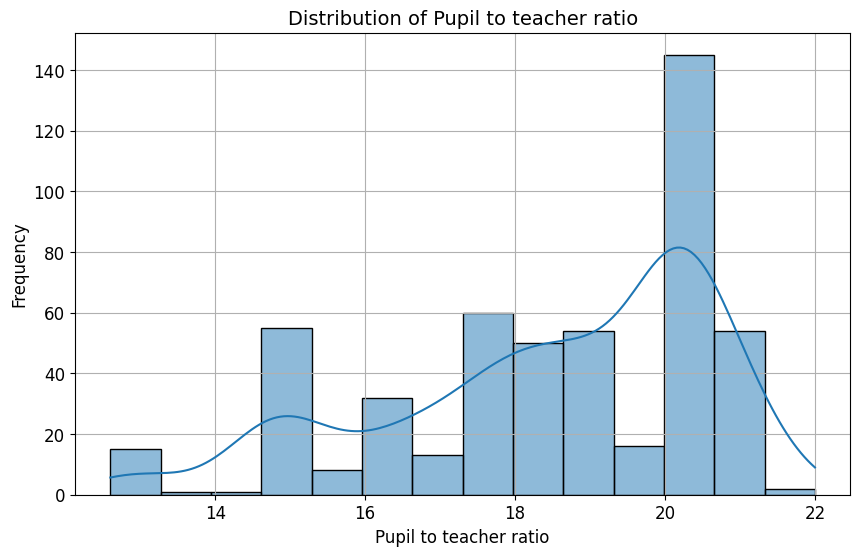

In [49]:
# PTRATIO - pupil-teacher ratio by town

# Create the histogram with KDE
# Kernel Density Estimate (KDE) option will overlay the KDE curve on top of the histogram, providing a smooth estimate of the data distribution.
plt.figure(figsize=(10, 6))
ax = sns.histplot(boston_df['PTRATIO'], bins='auto', kde=True)

plt.xlabel('Pupil to teacher ratio', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Pupil to teacher ratio', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True)
plt.show()

## 3. Hypothesis & Testing

Be sure to:

- State your hypothesis.

- Use **α (alpha value, significance level) = 0.05**: The alpha value is a threshold set before the test to decide whether to reject the null hypothesis.

- Perform the test Statistics.

- State the conclusion from the test.

### 3.1) Is there a significant difference in median value of houses bounded by the Charles river or not? (**T-test for independent samples**)

**Hypothesis**

Null Hypothesis:
- H\_0: µ\_1 = µ\_2 (there is no difference in median value of houses bounded by the Charles river)

Alternative Hypothesis: 
- H\_1: µ\_1 ≠ µ\_2 (there is a difference in median value of houses bounded by the Charles river)

**Levene's Test to check equal variances**

The Levene's test is commonly used to check the assumption of equal variances between groups before deciding whether to use `equal_var=True` (**pooled t-test**) or `equal_var=False` (**Welch's t-test**).

**How Levene's Test Works**

**Null hypothesis (H₀):** Variances of the groups are equal.

**Alternative hypothesis (H₁):** At least one group has a different variance.

If `p-value > α` (say `α = 0.05`) = Fail to reject H₀ = assume equal variances → use pooled t-test (equal_var=True).

If `p-value < α` = Reject H₀ = variances are unequal = use Welch’s t-test (equal_var=False).

In [50]:
# Levene test to assess variance equality
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

`P-value < 0.05`, i.e. variances are not equal. Therefore we proceed with **t-test** with `equal_var=False`.

In [51]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

**Conclusion:**

`p-value = 0.003567 < 0.05`, so we reject the null hypothesis. 

There is a significant difference in the median value of houses bounded by the Charles River compared to those not bounded by the river.

### 3.2) Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (**ANOVA**)

**ANOVA assumption:** all groups should have equal variances (homogeneity of variance).

**Levene's test:** checks if the variances across the groups are equal.

So the workflow usually goes like this:

1. Check assumptions:

    - Equal variances (using Levene’s test).

2. Run ANOVA:

    - If Levene's test is not significant (`p > α`): variances are equal => use standard ANOVA.

    - If Levene's test is significant (`p < α`): variances are unequal => use a Welch's ANOVA (robust version that does not assume equal variances).

Group the data into 3 age groups:

- 35 years and younger

- Between 35 and 70 years

- 70 years and older

In [57]:
(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70)

0       True
1      False
2       True
3       True
4       True
       ...  
501     True
502    False
503    False
504    False
505    False
Name: AGE, Length: 506, dtype: bool

In [72]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

In [73]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


**Hypothesis:**

H\_0: µ\_1 = µ\_2 = µ\_3: The three population medians are equal, i.e., there is no difference in the three population medians

H\_1: At least one of the medians differs

In [74]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

`p-value > 0.05`, i.e. the variances are equal

Since, variances are equal and `p (0.0629) > α (0.05)`, we can use the **standard ANOVA** test.

**ANOVA** uses the **F-statistic** to compare the ratio of variance between groups to variance within groups, and tests the null hypothesis.

In [75]:
f_statistic, p_value = scipy.stats.f_oneway(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:**

`p-value = 1.71e-15 < 0.05`, hence, we reject the null hypothesis of equal medians as there is evidence that at least one of the medians differs.

### 3.3) Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (**Pearson Correlation**)

**Hypothesis:**

H\_0: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

H\_1: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [76]:
# INDUS - proportion of non-retail business acres per town
# NOX - nitric oxides concentration (parts per 10 million)

scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conclusion:**

`p-value < 0.05`, hence, we reject the null hypothesis. 

With a Pearson correlation coefficient of 0.764 and a very small p-value (close to zero), we conclude that there is a strong positive linear relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).

### 3.4) What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (**Regression analysis**)

**Hypothesis:**

H\_0: β\_1 = 0: There is no effect of the weighted distance to the employment centers on the median value of owner-occupied homes.

H\_1: β\_1 ≠ 0: There is an effect of the weighted distance to the employment centers on the median value of owner-occupied homes.

In [77]:
# DIS - weighted distances to five Boston employment centres
# MEDV - Median value of owner-occupied homes in $1000's

X = boston_df['DIS']  # Independent variable (DIS)
y = boston_df['MEDV']  # Dependent variable (MEDV)

# Add a constant term to the independent variable
X = sm.add_constant(X)

# Perform the regression analysis
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 26 Aug 2025   Prob (F-statistic):           1.21e-08
Time:                        23:56:52   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

**Conclusion:**

`p-value < 0.05`, hence, we reject the null hypothesis. 

Therefore, there is a significant linear relationship between the weighted distance to the employment centers (DIS) and the median value of owner-occupied homes (MEDV).